## 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.cluster import KMeans

plt.rc('font', family='Malgun Gothic')

In [2]:
df_list = []

for i in range(1, 13):
    file_path = f"DATA/대구광역시립동부도서관 장서 대출목록 (2023년 {i:02d}월).csv"
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    df['집계월'] = i
    df_list.append(df)
    print("succeed")

df_origin = pd.concat(df_list, ignore_index=True)

succeed
succeed
succeed
succeed
succeed
succeed
succeed
succeed
succeed
succeed
succeed
succeed


In [3]:
df = df_origin.copy()

In [4]:
df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13,집계월
0,1,(지랄발랄 하은맘의) 닥치고 군대 육아:산전수전 다 겪은 언니의 육아 멘토링,김선미 지음,알에이치코리아(RHK),2023,9788925577203,NaN,1,NaN,598.1,1,0,2023-01-30,NaN,1
1,2,백제 최후의 날:박상기 장편동화,박상기 글;송효정 그림,비룡소,2022,9788949121987,NaN,7,NaN,813.8,1,0,2023-01-30,NaN,1
2,3,수상한 아랫집의 비밀,딸기 글;시미씨 그림,해와나무,2022,9788962682878,NaN,7,NaN,813.8,1,0,2023-01-30,NaN,1
3,4,(소원을 들어주는) 미호네.,글: 이나영;그림: 윤성,겜툰,2022,9791168440470,NaN,7,6,813.8,1,0,2023-01-30,NaN,1
4,5,"우리 반 방정환:어린이의 벗 방정환, 가족을 만나다!",장경선 글; 원유미 그림,리틀씨앤톡,2022,9788960988675,NaN,7,NaN,813.8,1,0,2023-01-30,NaN,1


In [5]:
df.columns

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자', 'Unnamed: 13', '집계월'],
      dtype='object')

In [6]:
df.shape

(3717961, 15)

In [7]:
df = df[['집계월', '도서명', '저자', '출판사', '발행년도', '주제분류번호', '도서권수', '대출건수', '등록일자']]
df.head()

,집계월,도서명,저자,출판사,발행년도,주제분류번호,도서권수,대출건수,등록일자
0,1,(지랄발랄 하은맘의) 닥치고 군대 육아:산전수전 다 겪은 언니의 육아 멘토링,김선미 지음,알에이치코리아(RHK),2023,598.1,1,0,2023-01-30
1,1,백제 최후의 날:박상기 장편동화,박상기 글;송효정 그림,비룡소,2022,813.8,1,0,2023-01-30
2,1,수상한 아랫집의 비밀,딸기 글;시미씨 그림,해와나무,2022,813.8,1,0,2023-01-30
3,1,(소원을 들어주는) 미호네.,글: 이나영;그림: 윤성,겜툰,2022,813.8,1,0,2023-01-30
4,1,"우리 반 방정환:어린이의 벗 방정환, 가족을 만나다!",장경선 글; 원유미 그림,리틀씨앤톡,2022,813.8,1,0,2023-01-30


## 주제분류번호에 따른 대출건수로 알아보는 2023년 인기 주제

In [8]:
cat_pop = df.groupby('주제분류번호')['대출건수'].sum().sort_values(ascending=False)
cat_pop.head()

주제분류번호
813.6    9282848
843      8927464
813.8    7425515
863      1864785
818      1598887
Name: 대출건수, dtype: int64

In [9]:
# 대출건수 top5 주제별 대출건수 가장 많은 책 알아보기
cat_pop_list = cat_pop.head().index.tolist()
cat_pop_book_names = []

for cat in cat_pop_list:
    cat_pop_book_names.append(df.loc[df['주제분류번호'] == cat, ['도서명', '대출건수']].groupby('도서명')['대출건수'].sum().sort_values(ascending=False).index[0])

In [10]:
cat_pop_book_names

['太白山脈', 'Oxford Reading Tree:Stage 1+', '(동화)토지', '땡땡의 모험', '졸라맨 코믹스']

#### 웹 브라우저 검색을 통해 해당 주제분류번호를 자연어로 치환
- 813.6 : 한국소설
- 843 : 영미소설
- 813.8 : 어린이 문학
- 863 : 프랑스 소설
- 818 : 한국 에세이

In [11]:
df['주제분류번호'].isnull().sum()

89378

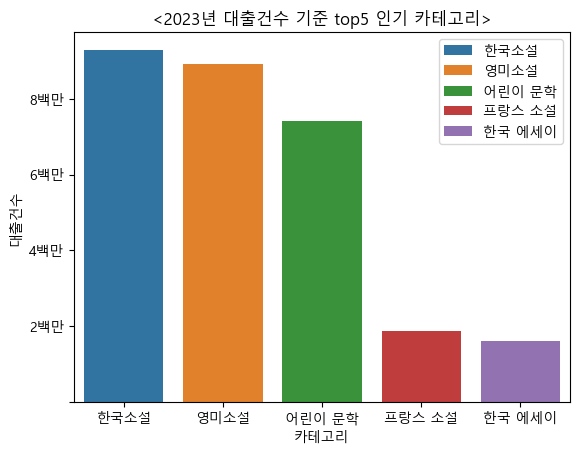

In [12]:
# 인기 카테고리 대출건수 시각화
top5_cat_pop = cat_pop.to_frame().head()
cat_korean = ["한국소설", "영미소설", "어린이 문학", "프랑스 소설", "한국 에세이"]
g = sns.barplot(data=top5_cat_pop, x=top5_cat_pop.index, y=top5_cat_pop['대출건수'], label=cat_korean)
g.set_xticklabels(cat_korean)
plt.xlabel("카테고리")
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.yticks(np.arange(0, 10000000, 2000000), ['','2백만','4백만','6백만', '8백만'])
# plt.gca().yaxis.set_major_formatter(FuncFormatter(FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000) + '백만')))
plt.title("<2023년 대출건수 기준 top5 인기 카테고리>")
plt.show()

In [13]:
# 카테고리 상관없이 대출건수 기준 인기 있는 도서들 (30위)
df.groupby('도서명')['대출건수'].sum().sort_values(ascending=False).head(30)

도서명
퀴즈! 과학상식                        143545
마법천자문:손오공의 한자 대탐험               117757
수학도둑                            117601
세계 탐험 만화 역사상식                   102102
(만화)삼국지                          94696
신기한 스쿨버스 키즈                      80484
太白山脈                             77787
비뢰도                              74817
삼국지                              71460
(위기탈출)넘버원                        69560
(만화로 보는)그리스 로마 신화                68621
퇴마록                              67526
三國志                              66261
땡땡의 모험                           63892
달팽이과학동화                          60792
(만화로 보는)그리스 로마신화                 58552
테마 세계 명작                         58056
Oxford Reading Tree:Stage 1+     55417
어린이 삼국유사.삼국사기                    53493
土地                               52943
묵향 :외전·다크 레이디                    52048
상상대로 생각동화                        51884
(야심만만)한국고전 천자문                   51740
정령왕 엘퀴네스                         51612
세계인물교양만화 Who?                    51362
원피스=One piece        

## 도서관에 존재하는 카테고리별 도서 수와 대출 건수와의 상관관계

In [14]:
cat_pop_indices = cat_pop.index.tolist()
cat_pop_df = pd.DataFrame(np.arange(1, len(cat_pop_indices)+1), columns=["pop"])
cat_pop_df.index = cat_pop_indices
cat_pop_df.head()

,pop
813.6,1
843,2
813.8,3
863,4
818,5


In [15]:
cat_exist = df['주제분류번호'].value_counts().index.tolist()
cat_exist_df = pd.DataFrame(np.arange(1, len(cat_exist)+1), columns=["exist"])
cat_exist_df.index = cat_exist
cat_exist_df.head()

,exist
843,1
813.8,2
813.6,3
818,4
813.7,5


In [16]:
joined = cat_exist_df.join(cat_pop_df)
joined.corr()

,exist,pop
exist,1.000000,0.794128
pop,0.794128,1.000000


In [17]:
joined['diff'] = joined['exist'] - joined['pop']

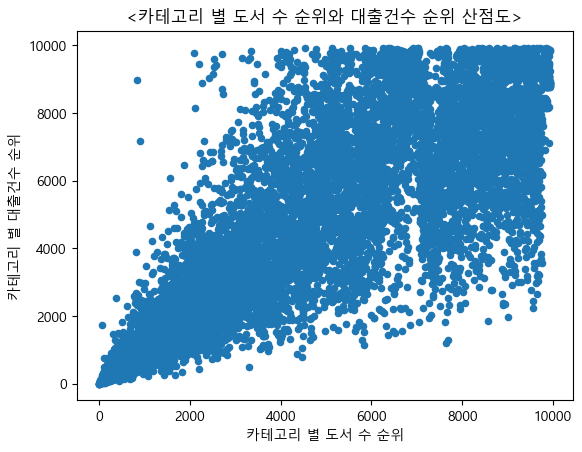

In [18]:
joined.plot(kind='scatter', x="exist", y="pop")
plt.xlabel("카테고리 별 도서 수 순위")
plt.ylabel("카테고리 별 대출건수 순위")
plt.title("<카테고리 별 도서 수 순위와 대출건수 순위 산점도>")
plt.show()

In [19]:
# 카테고리 순위에 비해 인기 순위가 높아 더 많은 책을 구비할 필요가 있어보이는 카테고리들
condition1 = joined['pop'] <= 100
condition2 = joined['diff'] >= 100
joined[condition1 & condition2].sort_values('diff', ascending=False)
# 808.8 은 세계 문학

,exist,pop,diff
808.8,427,88,339
980.8,315,100,215
388.3,239,77,162
511.1,229,90,139
830,204,67,137
817,180,56,124
219.2,199,81,118
634.9,207,92,115
388.311,148,46,102
